<a href="https://colab.research.google.com/github/AnnaPechenina/2016-08-23-unt-github-collaboration/blob/master/Intro_to_Python_Day_7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from SI618 in-class notebook 2



<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

## Day 7 & 8 Pandas

![meme](https://pics.me.me/import-pandas-as-np-import-numpy-as-p-i-dont-22440858.png)


## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Sort a DataFrame by index or column
* Group data and calculate aggregate statistics
* Make basic plots (scatter plot, histogram, bar chart, etc)

In [ ]:
import numpy as np
import pandas as pd

### <font color="magenta">write code to create a new array called sqrt_scores that contains the square roots of each of the original scores</font>

In [ ]:
ar_scores = np.array([3.75, 6.25, 5.  , 5.  , 6.25])

In [ ]:
# insert your code here
# sqrt_scores = [score**0.5 for score in ar_scores]
sqrt_scores = np.sqrt(ar_scores)
sqrt_scores

array([1.93649167, 2.5       , 2.23606798, 2.23606798, 2.5       ])

## pd.Series

In [ ]:
import pandas as pd

In [ ]:
names = ['Alphonso','Beata','Cal','Din','Ella']
scores = [3,5,4,4,5]

In [ ]:
s_names = pd.Series(names)

In [ ]:
s_names

0    Alphonso
1       Beata
2         Cal
3         Din
4        Ella
dtype: object

In [ ]:
s_scores = pd.Series(scores)
s_scores

0    3
1    5
2    4
3    4
4    5
dtype: int64

In [ ]:
names # just to remind ourselves what names looks like

['Alphonso', 'Beata', 'Cal', 'Din', 'Ella']

In [ ]:
s_scores = pd.Series(scores,index=names)
s_scores

Alphonso    3
Beata       5
Cal         4
Din         4
Ella        5
dtype: int64

## pd.DataFrame

In [ ]:
df = pd.DataFrame({"name":names,"score":scores})

In [ ]:
df

,name,score
0,Alphonso,3
1,Beata,5
2,Cal,4
3,Din,4
4,Ella,5


In [ ]:
specializations = ['DS', 'UX', 'UX', 'DS', 'DS']

In [ ]:
df['specialization'] = specializations
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


Let's say we wanted to set the "name" column to be the index:

In [ ]:
df.set_index("name")

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [ ]:
df_indexed_by_name = df.set_index("name")

In [ ]:
df_indexed_by_name

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [ ]:
df.set_index("name",inplace = True) # equivalent to df = df.set_index("name")

In [ ]:
df

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [ ]:
df.reset_index(inplace = True)
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


Mental Health Disorders In the Tech Workplace
From https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata
|Field|Description|
|:----|:----|
|**Timestamp**|
|**Age**| 
|**Gender**
|**Country**
|**state**| If you live in the United States, which state or territory do you live in?
|**self_employed**| Are you self-employed?
|**family_history**| Do you have a family history of mental illness?
|**treatment**| Have you sought treatment for a mental health condition?
|**work_interfere**| If you have a mental health condition, do you feel that it interferes with your work?
|**no_employees**| How many employees does your company or organization have?
|**remote_work**| Do you work remotely (outside of an office) at least 50% of the time?
|**tech_company**| Is your employer primarily a tech company/organization?
|**benefits**| Does your employer provide mental health benefits?
|**care_options**| Do you know the options for mental health care your employer provides?
|**wellness_program**| Has your employer ever discussed mental health as part of an employee wellness program?
|**seek_help**| Does your employer provide resources to learn more about mental health issues and how to seek help?
|**anonymity**| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
|**leave**| How easy is it for you to take medical leave for a mental health condition?
|**mental_health_consequence**| Do you think that discussing a mental health issue with your employer would have negative consequences?
|**phys_health_consequence**| Do you think that discussing a physical health issue with your employer would have negative consequences?
|**coworkers**| Would you be willing to discuss a mental health issue with your coworkers?
|**supervisor**| Would you be willing to discuss a mental health issue with your direct supervisor(s)?
|**mental_health_interview**| Would you bring up a mental health issue with a potential employer in an interview?
|**phys_health_interview**| Would you bring up a physical health issue with a potential employer in an interview?
|**mental_vs_physical**| Do you feel that your employer takes mental health as seriously as physical health?
|**obs_consequence**| Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
|**comments**| Any additional notes or comments



Let's load the usual libraries and also ask for plots to be rendered inside the notebook:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

Then read the CSV file into a DataFrame:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [ ]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
373,2014-08-27 15:22:20,32,F,United States,WA,No,No,Yes,Sometimes,26-100,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,My employer does what they can providing a wel...
969,2014-08-29 06:42:57,33,female,United Kingdom,NaN,Yes,No,Yes,Sometimes,1-5,...,Very easy,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1118,2014-08-30 16:13:40,38,Male,United States,NY,No,Yes,Yes,Rarely,More than 1000,...,Somewhat easy,Yes,No,No,Yes,No,Yes,Don't know,No,NaN
811,2014-08-28 14:02:07,29,m,United Kingdom,NaN,No,No,Yes,Sometimes,100-500,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,No,No,NaN


Finally, you can get some basic information about the size and shape of the DataFrame:

In [ ]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [ ]:
print(df['Country'])
print(type(df.Country))

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
             ...      
1254    United Kingdom
1255     United States
1256     United States
1257     United States
1258     United States
Name: Country, Length: 1259, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
country_state = df[['Country', 'state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


## Extracting rows

In [ ]:
df.iloc[1]

Timestamp                    2014-08-27 11:29:37
Age                                           44
Gender                                         M
Country                            United States
state                                         IN
self_employed                                NaN
family_history                                No
treatment                                     No
work_interfere                            Rarely
no_employees                      More than 1000
remote_work                                   No
tech_company                                  No
benefits                              Don't know
care_options                                  No
wellness_program                      Don't know
seek_help                             Don't know
anonymity                             Don't know
leave                                 Don't know
mental_health_consequence                  Maybe
phys_health_consequence                       No
coworkers           

In [ ]:
df.loc[1]

Timestamp                    2014-08-27 11:29:37
Age                                           44
Gender                                         M
Country                            United States
state                                         IN
self_employed                                NaN
family_history                                No
treatment                                     No
work_interfere                            Rarely
no_employees                      More than 1000
remote_work                                   No
tech_company                                  No
benefits                              Don't know
care_options                                  No
wellness_program                      Don't know
seek_help                             Don't know
anonymity                             Don't know
leave                                 Don't know
mental_health_consequence                  Maybe
phys_health_consequence                       No
coworkers           

In [ ]:
df.head(1)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [ ]:
df_gender = df.set_index('Gender')

In [ ]:
df_gender.head()

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Female,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
M,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
Male,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
Male,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
Male,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df_gender.loc[219] #  will throw an exception


KeyError: ignored

In [ ]:
df.iloc['Gender'] # will throw an exception

TypeError: ignored

In [ ]:
df_gender.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers                           Some of them
supervisor          

## Sorting
You can use either sort_values() or sort_index():


In [ ]:
df_sorted = df.sort_values('Age')
df_sorted.tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
471,2014-08-27 16:13:40,58,Male,United States,CA,No,No,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
952,2014-08-29 01:20:32,61,male,South Africa,NaN,Yes,No,Yes,Sometimes,1-5,...,Very difficult,Yes,Maybe,Some of them,Yes,No,Maybe,No,Yes,NaN
520,2014-08-27 17:12:01,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


## Filtering using Boolean Masking

In [ ]:
df.Age

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [ ]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [ ]:
df[df['Age'] > 0]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [ ]:
df[df['Age'] > 40]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2015-02-21 11:48:52,41,female,Netherlands,NaN,Yes,No,Yes,Rarely,1-5,...,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Yes,No,The data will be skewed for self-employed peop...
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1243,2015-05-05 14:22:18,43,f,United States,FL,No,Yes,Yes,Rarely,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1248,2015-06-25 12:24:31,41,Female,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,No,Don't know,No,NaN


### Example: Find people who reported a family history of mental health conditions. </font>

Solution:

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
family_ory_mask = df.family_history=='Yes'
df[df.family_history=='Yes'].tail(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


You can use a simple expression like ```df[df['family_history'] == 'Yes']``` or you can make more complex boolean expressions using parentheses: 


In [ ]:
df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
df_filtered.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...


### <font color="magenta">How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [ ]:
# insert your code here
df[(df['coworkers'] != "No") | (df['supervisor'] != "No")]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN


### There are 1060 people who are willing to discuss a mental health issue with their supervisor or their coworkers

In [ ]:
df[(df['coworkers'] != "No") | (df['supervisor'] == "No")].Age.mean()

83472484.77629383

In [ ]:
df[((df['coworkers'] == "Yes") | (df['coworkers'] == "Some of them")) & (df['supervisor'] == "No")]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
16,2014-08-27 11:34:20,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...
26,2014-08-27 11:37:23,33,male,United States,TN,No,No,No,NaN,1-5,...,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
28,2014-08-27 11:38:12,34,male,United States,OH,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,No,No,Some of them,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2015-04-06 14:58:29,31,male,Germany,NaN,No,Yes,Yes,Sometimes,100-500,...,Somewhat easy,No,No,Some of them,No,No,No,Don't know,No,NaN
1241,2015-04-11 14:35:22,31,Male,Poland,NaN,Yes,No,Yes,Often,6-25,...,Somewhat easy,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
1247,2015-05-07 10:08:50,36,male,Finland,NaN,No,No,Yes,Often,6-25,...,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes,NaN
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN


In [ ]:
df['coworkers']

0       Some of them
1                 No
2                Yes
3       Some of them
4       Some of them
            ...     
1254    Some of them
1255    Some of them
1256              No
1257              No
1258    Some of them
Name: coworkers, Length: 1259, dtype: object

### <font color="magenta">Q6: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996). Make appropriate assumptions when constructing your filter. </font>

In [ ]:
# insert your code here
df_millenials = df[(df['Age']>=18) & (df['Age']<= 38)]
df_millenials

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


Here I make the assumption all the age is collected in 2014 for all data.

**NOTE: We will still use df for the following analysis**

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [ ]:
df['Age'].mean()

79428148.31135821

In [ ]:
(df['Age'] > 0) & (df['Age'] < 100)

0       True
1       True
2       True
3       True
4       True
        ... 
1254    True
1255    True
1256    True
1257    True
1258    True
Name: Age, Length: 1259, dtype: bool

In [ ]:
df[(df['Age'] > 0) & (df['Age'] < 100)].Age.mean()

32.01913875598086

### Does that look right?  What should we do?

In [ ]:
df.sort_values('Age').tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
471,2014-08-27 16:13:40,58,Male,United States,CA,No,No,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
952,2014-08-29 01:20:32,61,male,South Africa,NaN,Yes,No,Yes,Sometimes,1-5,...,Very difficult,Yes,Maybe,Some of them,Yes,No,Maybe,No,Yes,NaN
520,2014-08-27 17:12:01,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


### <font color="magenta">Q7: What is the _median_ age of the survey sample?  </font>

In [ ]:
# insert code here
df['Age'].median()

31.0

The median age of the survey is 31.

### <font color="magenta">Q8: Write one line of code to compute basic statistics (mean, standard deviation, min, 25% percentile, etc) about Age  </font>

Hint: see the readings

In [ ]:
# insert your code here
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [ ]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [ ]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Example: Write one line of code to count the occurrences of the countries and show the top 5 countries.  </font>

Solution:

In [ ]:
df.Country.value_counts().head(6)
# be careful about the top 5

United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Name: Country, dtype: int64

Are you sure that's correct?

be careful about the top 5

### <font color="magenta">Q9: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [ ]:
# insert your code here
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [ ]:
df['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

### <font color="magenta">Q10: Among the people from United States, how many repondents were there from each state?  </font>

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
# insert your code here
df[df['Country'] == "United States"]['state'].value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
PA     29
OR     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
GA     12
WI     12
MO     12
UT     10
CO      9
AL      8
AZ      7
MD      7
OK      6
NJ      6
KY      5
SC      5
DC      4
CT      4
IA      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

In [ ]:
df.benefits

0              Yes
1       Don't know
2               No
3               No
4              Yes
           ...    
1254            No
1255           Yes
1256           Yes
1257            No
1258           Yes
Name: benefits, Length: 1259, dtype: object

In [ ]:
df.benefits.value_counts(normalize=True)

Yes           0.378872
Don't know    0.324067
No            0.297061
Name: benefits, dtype: float64

In [ ]:
type(df.benefits.value_counts(normalize=True))

pandas.core.series.Series

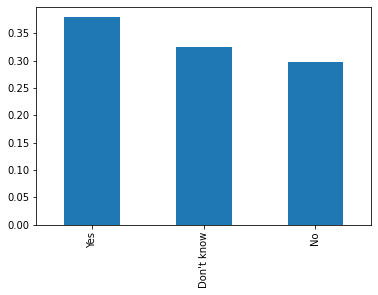

In [ ]:
df.benefits.value_counts(normalize=True).plot.bar()

Example: Create a histogram of the distribution of Age values:

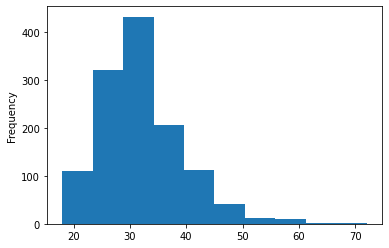

In [ ]:
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist()

### <font color="magenta">Q11: Experiment with the number of bins in the histogram of the Age distribution.  Is there a "best" value?</font>

Hint: use the bins= option to plot()

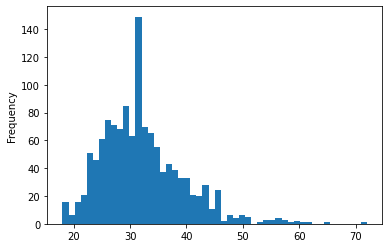

In [ ]:
# insert your code here
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist(bins=50)

## Aggregation

Example: Find the number of participants from each state.

Solution:

In [ ]:
df.state.value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [ ]:
df.groupby('state').size()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     29
IN     27
KS      3
KY      5
LA      1
MA     20
MD      8
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     57
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     11
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
dtype: int64

### <font color="magenta">Q12: Find the median age of people for each state. </font>

In [ ]:
# insert your code here
df[df['Country'] == "United States"].groupby('state').Age.median()

state
AL    34.0
AZ    33.0
CA    31.0
CO    31.0
CT    37.5
DC    37.5
FL    34.0
GA    30.0
IA    40.0
ID    55.0
IL    30.0
IN    34.0
KS    39.0
KY    24.0
LA    35.0
MA    32.0
MD    29.0
ME    40.0
MI    34.0
MN    30.0
MO    33.5
MS    33.0
NC    32.0
NE    26.0
NH    34.0
NJ    32.0
NM    29.5
NV    28.0
NY    29.0
OH    31.0
OK    26.5
OR    32.0
PA    31.0
RI    23.0
SC    30.0
SD    34.0
TN    33.0
TX    31.5
UT    30.0
VA    40.5
VT    34.0
WA    32.5
WI    33.0
WV    23.0
WY    41.5
Name: Age, dtype: float64

# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

## Time to load some data:

In [ ]:
import pandas as pd

In [ ]:
titles = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/titles.csv', index_col=None)

In [ ]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


The titles DataFrame contains a list of movie titles and release year

In [ ]:
cast = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/cast.zip', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [ ]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [ ]:
cast.sample(5)

,title,year,name,type,character,n
3140777,11 minut,2015,Elzbieta Matynia,actress,Courier's Lover,21.0
2472675,Jack Falls,2011,Marie Allcorn,actress,Resident,NaN
1671315,3 Knee Deep,2016,Jim (V) Owens,actor,Dimitriov,NaN
3456567,The Dragons of Melgor,2017,Laurette Spang,actress,Laurette,NaN
3277492,One Wild Oat,1951,Vera Pearce,actress,Mrs. Gilbey,3.0


In [ ]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

### <font color="magenta">Q13: How many entries are there in the cast table?</font>

In [ ]:
# insert your code here
len(cast.columns)

6

There are 6 entries in the cast table

### <font color="magenta">Q14: How many entries are there in the titles table?</font>

In [ ]:
# insert your code here
len(titles.columns)

2

There are title and year two entries.

### <font color="magenta">Q15: What are the two earliest movies?</font>

In [ ]:
# insert your code here
titles.sort_values('year').head(2)

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


The two earlies movies in titles dataset are "Miss Jerry" and "The Startled Lover".

### <font color="magenta">Q16: How many movies have the title "Hamlet"?</font>

In [ ]:
# insert your code here
len(titles[titles['title']=="Hamlet"])

18

There are 18 movies called "Hamlet".

### <font color="magenta">Q17: List all of the "Treasure Island" movies from earliest to most recent.</font>

In [ ]:
# insert your code here
titles[titles["title"] == "Treasure Island"].sort_values("year")

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


### <font color="magenta">Q18: What are the ten most common movie names of all time?</font>

In [ ]:
# insert your code here
titles.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
The Three Musketeers    11
Temptation              11
Kismet                  11
Freedom                 11
Othello                 11
Name: title, dtype: int64

The ten most common movie names are the left column in the above list.

<font color="magenta">Who are the 10 people most often credited as "Herself" in film history?</font>

In [ ]:
# insert code here
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634467 entries, 0 to 3634466
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 166.4+ MB


In [ ]:
cast.type.unique()

array(['actor', 'actress'], dtype=object)

In [ ]:
actress = cast[cast["type"] == "actress"]

In [ ]:
actress

,title,year,name,type,character,n
2455335,Night of the Demons,2009,"Stefanie Oxmann Mcgaha ""Steff""",actress,Goth raver,NaN
2455336,The Bad Lieutenant: Port of Call - New Orleans,2009,"Stefanie Oxmann Mcgaha ""Steff""",actress,Gambler,NaN
2455337,The Bad Lieutenant: Port of Call - New Orleans,2009,"Stefanie Oxmann Mcgaha ""Steff""",actress,Bar patron,NaN
2455338,A Woman of Distinction,1950,Lucienne & Ashour,actress,Apache Dancers,NaN
2455339,Around the World,1943,Lucienne & Ashour,actress,Apache Dancers,NaN
...,...,...,...,...,...,...
3634462,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3634463,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3634464,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3634465,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [ ]:
self = actress[actress.name == actress.character]

In [ ]:
self.head()

,title,year,name,type,character,n
2455630,Pattiyal,2006,Aarthi,actress,Aarthi,10.0
2457049,Sethu,1999,Abitha,actress,Abitha,2.0
2458138,Rana Pagla: The Mental,2016,Achol,actress,Achol,3.0
2458282,IDn4,1991,Kathy Acker,actress,Kathy Acker,NaN
2461462,The Last Horror Film,1982,Isabelle Adjani,actress,Isabelle Adjani,NaN


In [ ]:
self.groupby('name').size().sort_values(ascending = False).head(14)

name
Maxene Andrews         15
Laverne Andrews        15
Patty Andrews          10
Matutina                8
Zsa Zsa Gabor           7
Lena Horne              7
The Andrews Sisters     7
Connee Boswell          6
Carolina Cotton         6
Judy Canova             6
Hedda Hopper            6
Whoopi Goldberg         6
Dorothy Lamour          6
Frances Langford        6
dtype: int64

In [ ]:
num_size = self.groupby('name').size()

In [ ]:
num_size.sort_values(ascending=False).head(13)

name
Maxene Andrews         15
Laverne Andrews        15
Patty Andrews          10
Matutina                8
Zsa Zsa Gabor           7
Lena Horne              7
The Andrews Sisters     7
Connee Boswell          6
Carolina Cotton         6
Judy Canova             6
Hedda Hopper            6
Whoopi Goldberg         6
Dorothy Lamour          6
dtype: int64

## Learning Objectives
* load CSV files
* load JSON files
* use pd.read_html to extract tables from web pages
* load data from simple APIs 
* load data from a SQL database


Recall the ```pd.read_csv``` function that you've seen in previous classes:

In [ ]:
menu = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/menu.csv') 

In [ ]:
menu.head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15


That works great for well-formatted CSV files, but what happens when you get something that looks like the ```data/avocado_eu.csv``` file.

Referring back to your readings and the [read_csv documentation online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), complete the following exercise


Let's read the data/avocado_eu.csv file into a pandas DataFrame and show the first 5 rows.


In [ ]:
avocado = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/avocado_eu.csv',sep=';')
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,"1,33","64236,62","1036,74","54454,85","48,16","8696,87","8603,62","93,25","0,0",conventional,2015,Albany
1,1,2015-12-20,"1,35","54876,98","674,28","44638,81","58,33","9505,56","9408,07","97,49","0,0",conventional,2015,Albany
2,2,2015-12-13,"0,93","118220,22","794,7","109149,67","130,5","8145,35","8042,21","103,14","0,0",conventional,2015,Albany
3,3,2015-12-06,"1,08","78992,15","1132,0","71976,41","72,58","5811,16","5677,4","133,76","0,0",conventional,2015,Albany
4,4,2015-11-29,"1,28","51039,6","941,48","43838,39","75,78","6183,95","5986,26","197,69","0,0",conventional,2015,Albany


You'll notice that, unless you did something special in the previous read_csv invocation, the decimal points don't look quite right.  Go ahead and find the right option to convert commas to periods when loading a CSV file, as well as set the index column correctly (without having it duplicated):

# Loading JSON data

In addition to CSV files, JSON (JavaScript Object Notation) files or data are commonly used.  

In [ ]:
nfl_football_players = pd.read_json('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/nfl_football_profiles.json')

In [ ]:
nfl_football_players.head()

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year
0,1809,Robert Blackmon,DB,6-0,208.0,None,1967-05-12,"Bay City, TX",None,Baylor,"Van Vleck, TX",Seattle Seahawks,2.0,34.0,1990.0,None,NaN
1,23586,Dean Wells,LB,6-3,248.0,None,1970-07-20,"Louisville, KY",None,Kentucky,"Holy Cross, KY",Seattle Seahawks,4.0,85.0,1993.0,None,NaN
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN
3,18182,Steve Ramsey,QB,6-2,210.0,None,1948-04-22,"Dallas, TX",1999-10-15,North Texas,"W.W. Samuell, TX",New Orleans Saints,5.0,126.0,1970.0,None,NaN
4,16250,Cory Nelms,CB,6-0,195.0,None,1988-02-27,"Neptune, NJ",None,Miami (FL),"Neptune, NJ",None,NaN,NaN,NaN,None,NaN


And, just for fun, show the player with the highest Current Salary from that dataset:

In [ ]:
nfl_football_players.sort_values('current_salary', ascending=False).head(1)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year
6454,721,Jeremiah Attaochu,OLB,6-3,252.0,Los Angeles Chargers,1993-01-17,"Ibadan, Nigeria",None,Georgia Tech,"Archbishop Carroll, DE",San Diego Chargers,2.0,50.0,2014.0,"993,150",NaN


## Fixing up the data
Assuming you did something like sort_values on one of the original columns, you probably got the wrong result.

Looking a bit more closely at the results, you'll notice that the current_salary column.  Remembering that we have made the shift from pythonic to pandorable, we can leverage the impressive-sounding "vectorized string functions" mentioned in the McKinney book.  Specifically, we can use the str.replace(...) method.  Note that had we use read_csv to load the file we could have used the ```thousands=``` option and avoided all this, but sometimes data doesn't come in a convenient format.

One way to apply functions is to operate on a column and then assign the results to another column.  For example, if we wanted to eliminate commas, we could replace them with null strings

In [ ]:
nfl_football_players['current_salary'].str.replace(',', '')

0           None
1           None
2        1075000
3           None
4           None
          ...   
25038       None
25039       None
25040       None
25041       None
25042       None
Name: current_salary, Length: 25043, dtype: object

And assign the results to a column in the original dataframe (in this case I'm calling the column current_salary_nocommas)

In [ ]:
nfl_football_players['current_salary_nocommas'] = nfl_football_players['current_salary'].str.replace(',', '')

But you'll notice that the type of the column is string, and we want to convert it to a float so we can sort it numerically.  So we can use the astype() function to convert it:

In [ ]:
nfl_football_players.current_salary_nocommas.dtype

dtype('O')

In [ ]:
nfl_football_players['current_salary_cleaned'] = nfl_football_players['current_salary_nocommas'].astype(float)

In [ ]:
nfl_football_players.head(3)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
0,1809,Robert Blackmon,DB,6-0,208.0,None,1967-05-12,"Bay City, TX",None,Baylor,"Van Vleck, TX",Seattle Seahawks,2.0,34.0,1990.0,None,NaN,None,NaN
1,23586,Dean Wells,LB,6-3,248.0,None,1970-07-20,"Louisville, KY",None,Kentucky,"Holy Cross, KY",Seattle Seahawks,4.0,85.0,1993.0,None,NaN,None,NaN
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0


And now we can re-run our command to sort by salary and get the correct result:

In [ ]:
nfl_football_players.sort_values('current_salary_cleaned', ascending=False).head(1)

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
17756,4644,Kirk Cousins,QB,6-3,214.0,Washington Redskins,1988-08-19,"Holland, MI",None,Michigan St.,"Holland Christian, MI",Washington Redskins,4.0,102.0,2012.0,"23,943,600",NaN,23943600,23943600.0


## Dropping missing values

In addition to the "all" or "any" functionality described in McKinney section 7.1, it's sometimes useful to drop a row only if a certain column or columns have missing data.  To do this, use the subset= option with dropna().  So, for example, to drop all players for whom we do not have salary information, we could use the following code:

In [ ]:
nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])

In [ ]:
nfl_football_players_salaries.head()

,player_id,name,position,height,weight,current_team,birth_date,birth_place,death_date,college,high_school,draft_team,draft_round,draft_position,draft_year,current_salary,hof_induction_year,current_salary_nocommas,current_salary_cleaned
2,355,Kiko Alonso,ILB,6-3,238.0,Miami Dolphins,1990-08-14,"Newton, MA",None,Oregon,"Los Gatos, CA",Buffalo Bills,2.0,46.0,2013.0,"1,075,000",NaN,1075000,1075000.0
6,2701,Preston Brown,ILB,6-1,251.0,Buffalo Bills,1992-10-27,"Cincinnati, OH",None,Louisville,"Northwest, OH",Buffalo Bills,3.0,73.0,2014.0,"1,762,000",NaN,1762000,1762000.0
13,3966,Frank Clark,DE,6-2,270.0,Seattle Seahawks,1993-06-14,"Cleveland, OH",None,Michigan,"Glenville, OH",Seattle Seahawks,2.0,63.0,2015.0,"774,294",NaN,774294,774294.0
37,19449,Emmanuel Sanders,WR,5-11,186.0,Denver Broncos,1987-03-16,"Bellville, TX",None,SMU,"Bellville, TX",Pittsburgh Steelers,3.0,82.0,2010.0,"6,750,000",NaN,6750000,6750000.0
53,17858,Bilal Powell,RB,5-11,204.0,New York Jets,1988-10-27,"Lakeland, FL",None,Louisville,"Lake Gibson, FL",New York Jets,4.0,126.0,2011.0,"3,750,000",NaN,3750000,3750000.0


# Scraping Tables from HTML

The ```pd.read_html``` function returns a list of DataFrames read from an HTML source.  The following line will return a list of DataFrames from https://en.wikipedia.org/wiki/List_of_largest_sports_contracts

In [ ]:
contracts_scraped = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_sports_contracts',header=0)

In [ ]:
len(contracts_scraped)

1

To get the first table, you'll need to pull off the 0th element:

In [ ]:
contracts = contracts_scraped[0]
contracts.head()

,Rank,Name,Organization,Sport,Length of contract,Contract value (USD),Average per year (USD),Average per game/event[a] (USD),Ref
0,1,Lionel Messi[1],FC Barcelona*,Association football,4 years (2017–2021),"$240,000,000","$60,000,000","$3,743,995[b]",[2]
1,2,Patrick Mahomes[c]‡,Kansas City Chiefs,American football,10 years (2020–2030),"$503,000,000","$41,916,667","$2,465,686[d]",[3]
2,3,Mike Trout,Los Angeles Angels,Baseball,12 years (2019–2030),"$426,500,000","$35,541,667","$219,393",[4]
3,4,Canelo Álvarez,DAZN,Boxing,5 years (2018–2023),"$365,000,000","$73,000,000","$33,181,818",[5]
4,5,Max Verstappen,Red Bull Racing,Auto racing,5 years (2023–2028),"$275,000,000","$53,300,000","$2,422,727",[citation needed]


## IVQ Exercise: 

Count the number of players from each sport in the List of Largest Sports Contracts 

Hint:  remember ```value_counts()``` from your previous work.

In [ ]:
# insert your code here

# APIs and requests
You've covered the ```requests``` package in previous courses.  This example shows what you can do with an API that returns JSON:

In [ ]:
import requests

In [ ]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

In [ ]:
resp = requests.get(url)

In [ ]:
data = resp.json()

In [ ]:
data[0]['user']['login'] 

'phofl'

In [ ]:
issues = pd.DataFrame(data)
issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,active_lock_reason,draft,pull_request,body,reactions,timeline_url,performed_via_github_app,state_reason
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48018,1333793379,PR_kwDOAA0YD8486kAH,48018,ENH: Support mask in groupby sum,...,None,MEMBER,None,False,{'url': 'https://api.github.com/repos/pandas-d...,- [x] xref #37493 (Replace xxxx with the Githu...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48017,1333688729,I_kwDOAA0YD85PfnmZ,48017,DEPR: parse dates with `pyarrow` when `engine=...,...,None,MEMBER,None,NaN,NaN,xref https://github.com/pandas-dev/pandas/pull...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48015,1333518128,PR_kwDOAA0YD8485p8O,48015,TYP: avoid inherit_names for DatetimeIndexOpsM...,...,None,CONTRIBUTOR,None,False,{'url': 'https://api.github.com/repos/pandas-d...,Similar to #36742\r\n \r\nxref #32100\r\n,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48014,1332808407,I_kwDOAA0YD85PcQrX,48014,Update pyarrow dependency,...,None,NONE,None,NaN,NaN,Pandas 1.4 currently requires pyarrow 1.0.1 (r...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48012,1332776325,I_kwDOAA0YD85PcI2F,48012,WEB: Standardize website/docs footer,...,None,MEMBER,None,NaN,NaN,At the moment we've got different footer notes...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None


In [ ]:
issues.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'draft', 'pull_request', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason'],
      dtype='object')

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title','labels', 'state'])
issues.head()

,number,title,labels,state
0,48018,ENH: Support mask in groupby sum,"[{'id': 233160, 'node_id': 'MDU6TGFiZWwyMzMxNj...",open
1,48017,DEPR: parse dates with `pyarrow` when `engine=...,"[{'id': 47229171, 'node_id': 'MDU6TGFiZWw0NzIy...",open
2,48015,TYP: avoid inherit_names for DatetimeIndexOpsM...,[],open
3,48014,Update pyarrow dependency,[],open
4,48012,WEB: Standardize website/docs footer,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open


In [ ]:
issues.iloc[1]

number                                                48017
title     DEPR: parse dates with `pyarrow` when `engine=...
labels    [{'id': 47229171, 'node_id': 'MDU6TGFiZWw0NzIy...
state                                                  open
Name: 1, dtype: object

# Accessing databases
This section requires you to review your notes about SQL from previous courses.

We'll use this opportunity to gauge where we're at in terms of understanding SQL.

---



Let's install sqlalchemy and some database drivers.
(Does that make sense?  If not, let's talk about it when we get together.)

In [ ]:
!pip install sqlalchemy pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And import the relevant libraries:

In [ ]:
import sqlalchemy as sqla
import pandas as pd

Now let's set up some variables and connect to the database.  Note that the password is available through the video and you'll need to replace SECRET_REPLACE_ME with the password.

In [ ]:
endpoint = "database-370-fa2020.cgeyvh9t1svz.us-east-1.rds.amazonaws.com" 
username = "si370wn2020"
password = "SECRET_REPLACE_ME"
database = "goodreads"

db = sqla.create_engine(f'mysql+pymysql://{username}:{password}@{endpoint}/{database}')

Now the real part:  using `read_sql` to read some data from the database.  In this case, we're going to count the number of entries in the ratings table:

In [ ]:
df = pd.read_sql('select count(*) from ratings',db)
df.head()

OperationalError: ignored

We can get the SQL engine to do more of the work (instead of doing it in pandas):

In [ ]:
df = pd.read_sql('select rating, count(*) from ratings group by rating', db)
df.head()

## Summary
* load CSV files using `read_csv()` (options are useful)
* load JSON files using `read_json()`
* extract tables from web pages using `read_html()`
* load data from simple APIs by initializing a DataFrame from JSON (as an example)
* load data from a SQL database using `read_sql()`